# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [ ]:
print(int(0b1000011100001) )
def my_int(x):
  x=str(x)
  n=0
  e=len(x)
  for i in x:
    e-=1
    if i =="1":
      n+= 2**e
    else:
      continue
  return n
print(my_int(1000011100001))

4321
4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [ ]:
def number64(x):
  if len(x) != 64 or any(i not in '01' for i in x):
    return print("se debe tener 64 caracteres y ser de solo 0 y 1")
  signo_bit = x[0]
  if signo_bit == '1':
    signo= -1
  else:
    signo= 1

  exponente_bits = x[1:12]
  exponente = 0
  for i in range(11):
    if exponente_bits[i] == '1':
      exponente += 2 ** (10 - i)
  mantisa_bits = x[12:]
  mantisa = 0.0
  for i in range(52):
    if mantisa_bits[i] == '1':
      mantisa += 2 ** (-(i + 1))
  exponente_valor = exponente - 1023
  n = signo * (1 + mantisa) * (2 ** exponente_valor)
  return n
print(number64('0100000000111011100100001111111111111111111111111111111111111111'))  # Salida: 3.141592653589793

27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



In [2]:
import math as mt
import numpy as np
#a.1

def s_mac(x,tol=1e-4,m=100):
    arctan=0
    for i in range(1,m+1):
        arctan+=((-1)**(i+1))*(((x)**(2*i-1))/(2*i-1))
        if abs(4*arctan-np.pi) < tol:
            return 4*arctan , i
    return print("numero maximo de iteraciones", 4*arctan)
print(s_mac(1,1e-3,10000))
print(mt.pi)
#a.2
print(s_mac(1,1e-4,100000))



(3.140592653839794, 1000)
3.141592653589793
(3.1414926535900345, 10000)


In [ ]:
#b
def smac(x,tol=1e-4,m=100):
  arctan=0
  for i in range(1,m+1):
      arctan+=((-1)**(i+1))*(((x)**(2*i-1))/(2*i-1))
      if abs(arctan - np.arctan(x)) < tol:
           return arctan , i
      else:
        continue
  return print("numero maximo de iteraciones", arctan)
def cal_pi(tol=1e-3,m=10):
  for i in (1,m):
    pi=4*(smac(1/2,1*10**(-m),100000)[0]+smac(1/3,1*10**(-m),100000)[0])
    if abs(pi-np.pi)<tol:
      return pi, smac(1/2,1*10**(-m),100000)[1], smac(1/3,1*10**(-m),100000)[1]
      break
  return print(f"maximo de presicion {m}")
print(cal_pi(1e-3,3))
print(cal_pi(1e-6,6))
print(np.pi)

(3.1422839506172835, 3, 2)
(3.141593062690827, 8, 5)
3.141592653589793


In [ ]:
#c.1
def calpi(tol=1e-3,m=4):
  for i in (1,m):
    pi=4*(4*smac(1/5,1*10**(-m),100000)[0]-smac(1/239,1*10**(-m),100000)[0])
    if abs(pi-np.pi)<tol:
      return pi, smac(1/2,1*10**(-m),100000)[1], smac(1/3,1*10**(-m),100000)[1]
      break
  return print(f"maximo de presicion {m}")
print(np.pi)
print(calpi(1e-3,3))
print(calpi(1e-6,6))
#c.2
print("terminos requeridos para una precision de 1e-3 primer aproximacion:",s_mac(1,1e-3,10000)[1])
print("terminos requeridos para una precision de 1e-3 segunda aproximacion:",cal_pi(1e-3,3)[1],cal_pi(1e-3,3)[2])
print("terminos requeridos para una precision de 1e-3 tercera aproximacion:",calpi(1e-3,3)[1],calpi(1e-3,3)[2])

3.141592653589793
(3.1405969316596933, 3, 2)
(3.141591674516836, 8, 5)
terminos requeridos para una precision de 1e-3 primer aproximacion: 1000
terminos requeridos para una precision de 1e-3 segunda aproximacion: 3 2
terminos requeridos para una precision de 1e-3 tercera aproximacion: 3 2


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

In [ ]:
#a
def serie_exp(x,tol=1e-4,m=1000):
  e=0
  for n in range(0,m+1):
    t=(((-x)**n)/mt.factorial(n))
    if abs(t)<tol:
      return e , n
    else:
      e+=t
  return (f"no se consiguio la presicion con {m} iteraciones")
print(np.exp(-1))
print(serie_exp(1,1e-7))
er=(abs(serie_exp(1,1e-7)[0]-np.exp(-1))/np.exp(-1))*100
print("error relativo:",er,"%")

0.36787944117144233
(0.3678794642857144, 11)
error relativo: 6.283110569681271e-06 %


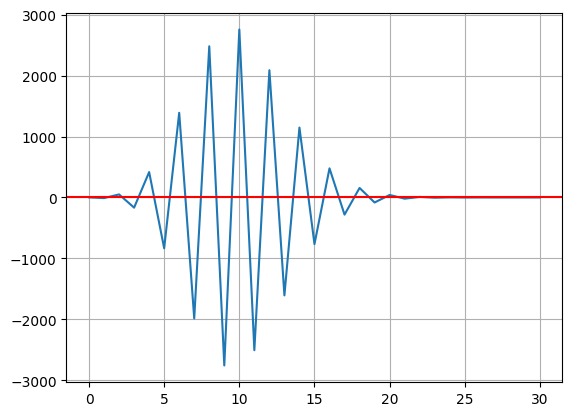

In [4]:
#b
import matplotlib.pyplot as plt
def serieexp(x,m=20):
  lis_t=[]
  e=0
  for n in range(0,m+1):
    t=(((-x)**(n))/mt.factorial(n))
    lis_t.append(t)
    e+=t
  return e , n , lis_t
x=np.linspace(0,30,31)
plt.plot(x,serieexp(10,30)[2])
plt.grid()
plt.axhline(np.exp(-10),color="red")

(4.5399929762619234e-05, 38, [1.0, 11.0, 61.0, 227.66666666666666, 644.3333333333334, 1477.6666666666667, 2866.5555555555557, 4850.68253968254, 7330.84126984127, 10086.573192239859, 12842.305114638448, 15347.51595318262, 17435.191651969428, 19041.09603565159, 20188.170595424563, 20952.886968606545, 21430.834701845284, 21711.980427279836, 21868.172496965697, 21950.37884943194, 21991.482025665064, 22011.054966728454, 22019.951758120904, 22023.819928291534, 22025.43166586263, 22026.076360891067, 22026.32432051739, 22026.416157416028, 22026.4489563084, 22026.460266271286, 22026.464036258916, 22026.465252383958, 22026.465632423035, 22026.46574758639, 22026.465781457966, 22026.465791135557, 22026.465793823776, 22026.46579455032, 22026.465794741518])
4.5399929762484854e-05


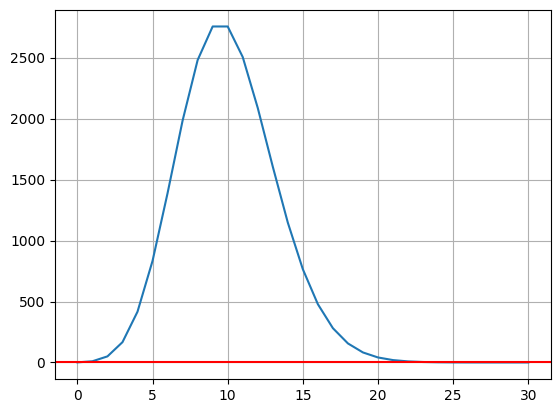

In [ ]:
#c
def ser_exp(x,tol=1e-4,m=50):
  e=0
  li=[]
  for n in range(0,m+1):
    t=(x**n)/mt.factorial(n)
    e += t
    li.append(e)
    if abs(e-np.exp(x))<tol:
      return 1/e, n, li
  return print("maximo de iteraciones",e, li)
print(ser_exp(10,1e-7,100))
print(np.exp(-10))
def serexp(x,m=20):
  lis_t=[]
  e=0
  for n in range(0,m+1):
    t= (x**n)/mt.factorial(n)
    lis_t.append(t)
    e+=t
  return 1/e , n , lis_t
x=np.linspace(0,30,31)
plt.plot(x,serexp(10,30)[2])
plt.grid()
plt.axhline(np.exp(-10),color="red")


In [ ]:
#d
er1=(abs(serie_exp(1,1e-7)[0]-np.exp(-1))/np.exp(-1))*100
er5=(abs(serie_exp(5,1e-7)[0]-np.exp(-5))/np.exp(-5))*100
er10=(abs(serie_exp(10,1e-7)[0]-np.exp(-10))/np.exp(-10))*100
er11=(abs(serie_exp(11,1e-7)[0]-np.exp(-11))/np.exp(-11))*100
er12=(abs(serie_exp(12,1e-7)[0]-np.exp(-12))/np.exp(-12))*100
er13=(abs(serie_exp(13,1e-7)[0]-np.exp(-13))/np.exp(-13))*100
er15=(abs(serie_exp(15,1e-7)[0]-np.exp(-15))/np.exp(-15))*100
er16=(abs(serie_exp(16,1e-7)[0]-np.exp(-16))/np.exp(-16))*100
er17=(abs(serie_exp(17,1e-7)[0]-np.exp(-17))/np.exp(-17))*100
er20=(abs(serie_exp(20,1e-7)[0]-np.exp(-20))/np.exp(-20))*100
er100=(abs(serie_exp(100,1e-7)[0]-np.exp(-100))/np.exp(-100))*100
print("error relativo para x=1:",er1,"%")
print("error relativo para x=5:",er5,"%")
print("error relativo para x=10:",er10,"%")
print("error relativo para x=11:",er11,"%")
print("error relativo para x=12:",er12,"%")
print("error relativo para x=13:",er13,"%")
print("error relativo para x=15:",er15,"%")
print("error relativo para x=16:",er16,"%")
print("error relativo para x=17:",er17,"%")
print("error relativo para x=20:",er20,"%")
print("error relativo para x=100:",er100,"%")
#se puede ver que para x>12 el error relativo ya supera el 1% por lo que la serie deja de tener presicion, ademas para x>16 el error es mas del 100% por ende a partir de ese numero la serie diverge

error relativo para x=1: 6.283110569681271e-06 %
error relativo para x=5: 0.001186836636695439 %
error relativo para x=10: 0.08630085872257656 %
error relativo para x=11: 0.1856497834092106 %
error relativo para x=12: 0.39428651160090483 %
error relativo para x=13: 3.047832521358225 %
error relativo para x=15: 12.87798963787018 %
error relativo para x=16: 26.28061537769591 %
error relativo para x=17: 184.1318691076896 %
error relativo para x=20: 1442.3984127450194 %
error relativo para x=100: 7.73010623978864e+71 %


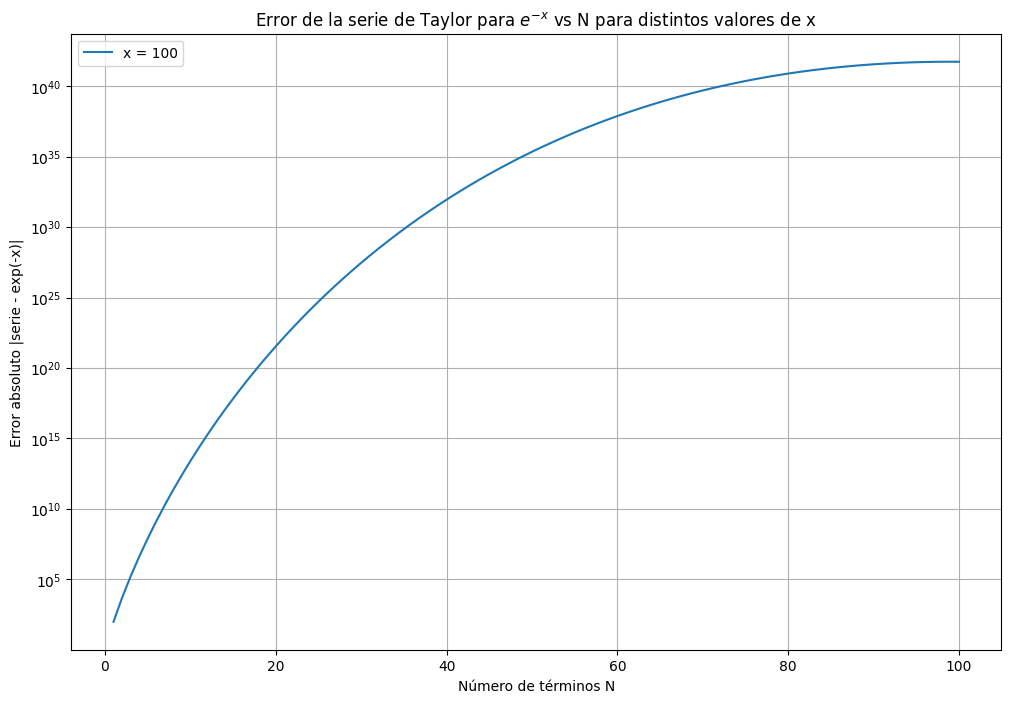

In [11]:
#e
x_v = [1, 5, 10, 20, 50, 100]
N_max = 100
for x in x_v:
  errores = []
  Nl = [i for i in range(1,N_max+1)]
  for N in Nl:
    appro = serieexp(x, N)[0]
    exact = np.exp(-x)
    error = abs(appro - exact)
    errores.append(error)
plt.figure(figsize=(12, 8))
plt.plot(Nl, errores, label=f"x = {x}")
plt.yscale("log")
plt.xlabel("Número de términos N")
plt.ylabel("Error absoluto |serie - exp(-x)|")
plt.title("Error de la serie de Taylor para $e^{-x}$ vs N para distintos valores de x")
plt.grid()
plt.legend()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [ ]:
#a.1
f=lambda x: x*(x-1)
#a.2
def df(f,x,a):
  F=(f(x+a)-f(x))/a
  return F
print("aproximacion:",df(f,1,1e-2))
#a.3
der_f=lambda x: x+(x-1)
print("resultado analitico:",der_f(1))
#los resultados no coinciden por que el valor exacto es cuando δ tiende a 0 y 10^(-2) no es un valor tan cercano a 0 y por ende no da exacto
#b
print("aproximacion 10^-4:", df(f,1,1e-4))
print("aproximacion 10^-6:", df(f,1,1e-6))
print("aproximacion 10^-8:", df(f,1,1e-8))
print("aproximacion 10^-10:", df(f,1,1e-10))
print("aproximacion 10^-12:", df(f,1,1e-12))
print("aproximacion 10^-14:", df(f,1,1e-14))
# creo que la presicion decae por que cada vez nos acercamos a dividir por 0 lo que causa mas problemas, ademas en la parte de arriba f(x+δ)−f(x) da cada vez mas pequeño y pueda que sobrepase el epsilon de la maquina

aproximacion: 1.010000000000001
resultado analitico: 1
aproximacion 10^-4: 1.0000999999998899
aproximacion 10^-6: 1.0000009999177333
aproximacion 10^-8: 1.0000000039225287
aproximacion 10^-10: 1.000000082840371
aproximacion 10^-12: 1.0000889005833413
aproximacion 10^-14: 0.9992007221626509
